# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:
1.  One material weakness in the data is when the data is run.  Open weather is live source for weather information and doing an API call at 9 AM CST for live weather data is not great for doing comaprisons and analysis as there are 24 different times zones. A better way of running the data would be to look at what the weather in each location at 9 AM.
2.  There is not a lot of appropriate data that can be compared latitude and thus should not be used as a driving comparison on most weather metrics outside of temperature.
3.  As mentioned a few times below, it is noticeable that winter temps and summer temps are affecting the data in the respective hemispheres.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Url and checking to make sure good gateway
# Also preview what JSON looks like 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
check = base_url + "&q=" + "Chicago"
print(requests.get(check))
print(base_url)
print(check)

<Response [200]>
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee4ec63c142897494738a6c236fbe0ff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee4ec63c142897494738a6c236fbe0ff&q=Chicago


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Setting lists for later on
city_name = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
latitude = []
longitude = []
country = []
date = []

# Header for call
print(f'Beginning Data Retrieval')
print(f'---------------------------')

# For loop creation
# Try and except needed to skip over when nothing is returned from call
for city in cities:
    try:
        url = requests.get(f"{base_url}&q={city}").json()
        city_name.append(url["name"])
        max_temp.append(url["main"]["temp_max"])
        humidity.append(url["main"]["humidity"])
        cloudiness.append(url["clouds"]["all"])
        windspeed.append(url["wind"]["speed"])
        latitude.append(url["coord"]["lat"])
        longitude.append(url["coord"]["lon"])
        country.append(url["sys"]["country"])
        date.append(url["dt"])
        print(f'Processing record for {city}')
    except:
        print("City not found. Skipping...")
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
---------------------------
Processing record for atuona
Processing record for albany
Processing record for tessalit
Processing record for sao filipe
Processing record for hilo
Processing record for launceston
Processing record for bahia honda
Processing record for viedma
Processing record for lebu
Processing record for jamestown
Processing record for port alfred
Processing record for sydney
Processing record for iberia
Processing record for high level
Processing record for cidreira
Processing record for gamba
Processing record for ahipara
Processing record for mahebourg
Processing record for saldanha
Processing record for ushuaia
Processing record for mataura
Processing record for college
Processing record for westport
Processing record for carnarvon
Processing record for hernani
Processing record for sechura
City not found. Skipping...
Processing record for cherskiy
City not found. Skipping...
Processing record for esperance
Processing record for cabo san luc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Put information into Dictionary
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": windspeed
}

# Save csv 
weather_df.to_csv('output_data/cities.csv')

# Create DF from Dictionary and ensure homogeneous data
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,30,PF,1579875166,79,-9.80,-139.03,80.31,11.65
1,Albany,1,US,1579875166,85,42.60,-73.97,34.00,2.24
2,Tessalit,100,ML,1579875166,6,20.20,1.01,89.60,10.31
3,Sao Filipe,4,CV,1579875166,70,14.90,-24.50,74.17,14.85
4,Hilo,90,US,1579875166,83,19.73,-155.09,69.80,1.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

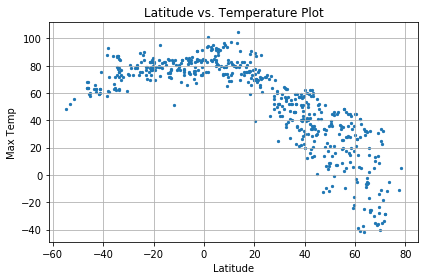

In [24]:
# Plot for Lat v. Temp
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], s=5)
plt.title(f'Latitude vs. Temperature')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig('output_data/temp_vs_lat.png')

plt.show()


Code and figure are looking at the comparison of latitude vs max temp.  Plot would indicate that it is most likely winter in the northern hemisphere and summer in the southern.

#### Latitude vs. Humidity Plot

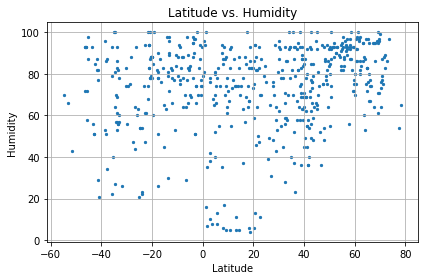

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], s=5)
plt.title(f'Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig('output_data/humidity_vs_lat.png')

plt.show()

Code and figure are looking at the comparison of latitude vs humidity.  It appears that there are not relationship between the two.

#### Latitude vs. Cloudiness Plot

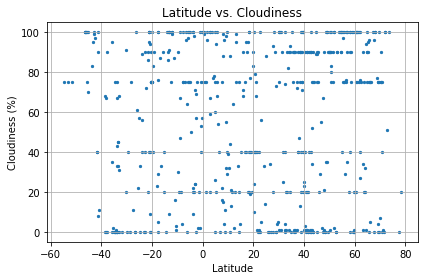

In [27]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], s=5)
plt.title(f'Latitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig('output_data/cloudiness_vs_lat.png')

plt.show()

Code and figure are looking at the comparison of latitude vs cloudiness. Again there is not much here for a person to make conclusions. 

#### Latitude vs. Wind Speed Plot

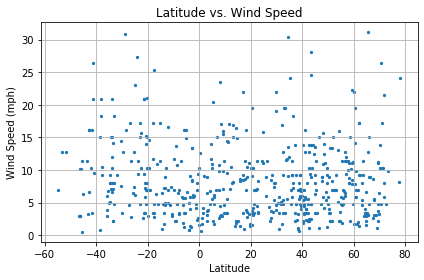

In [29]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], s=5)
plt.title(f'Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig('output_data/wind_vs_lat.png')

plt.show()

Code and figure are looking at the comparison of latitude vs windspeed.  The trend does appear to have a slight parabola shape to it indicating that higher wind speeds are higher closer to the poles, however, I would not make any definitive judgments. 

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(f'{x.name} vs {y.name}')
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15, color="red")
    plt.show()
    print(f'The r value is: {rvalue}')

In [38]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df.loc[weather_df["Lat"] >= 0]
south_hem = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

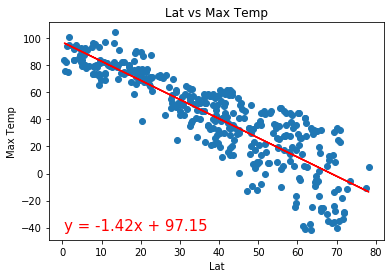

The r value is: -0.8676354329090421


<Figure size 432x288 with 0 Axes>

In [39]:
x = north_hem["Lat"]
y = north_hem["Max Temp"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_temp_north.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

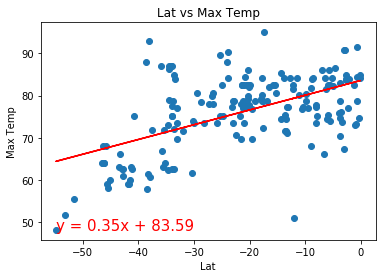

The r value is: 0.5498637663060499


<Figure size 432x288 with 0 Axes>

In [40]:
x = south_hem["Lat"]
y = south_hem["Max Temp"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_temp_south.png")

Looking at both figures, both tend to be increase as latitude runs towards 0 (the equator) which makes sense as the North Hemisphere is currently experience winter while the Southern Hemisphere is experiencing summer. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

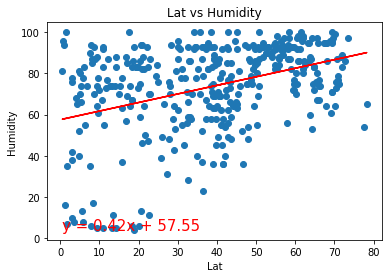

The r value is: 0.3848621277740497


<Figure size 432x288 with 0 Axes>

In [43]:
x = north_hem["Lat"]
y = north_hem["Humidity"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_humidity_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

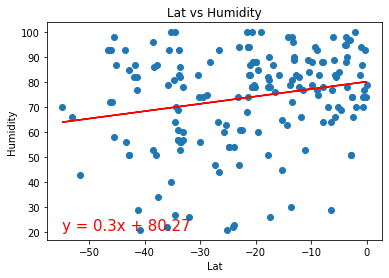

The r value is: 0.214102235283711


<Figure size 432x288 with 0 Axes>

In [44]:
x = south_hem["Lat"]
y = south_hem["Humidity"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_humidity_south.png")

Looking at both figures and results, neither hemisphere shows a high correlation between humidity and latitude. One trend that is slightly noticeable is there is very few low levels of humidity around the equator possibly suggesting more humid climates.  However, the inverse of this trend is not ture look away from the equator and humidity levels.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

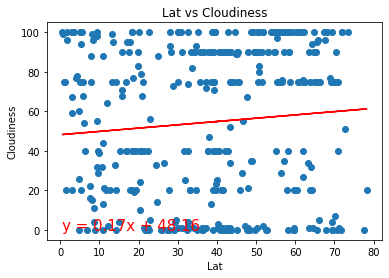

The r value is: 0.08747389310697531


<Figure size 432x288 with 0 Axes>

In [46]:
x = north_hem["Lat"]
y = north_hem["Cloudiness"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_cloudiness_north.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

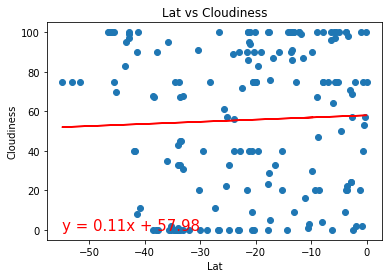

The r value is: 0.04037633387509986


<Figure size 432x288 with 0 Axes>

In [47]:
x = south_hem["Lat"]
y = south_hem["Cloudiness"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_cloudiness_south.png")

Both figures show almost zero correlation. Running cloudiness vs latitude is not a good measure in doing any statistical analysis, comparing cloudiness to another stat may yield results where a conclusion could be drawn.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

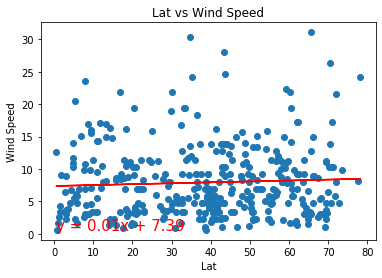

The r value is: 0.05224700105357039


<Figure size 432x288 with 0 Axes>

In [48]:
x = north_hem["Lat"]
y = north_hem["Wind Speed"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_wind_north.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

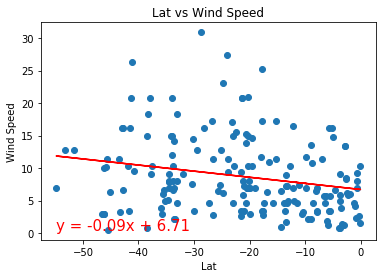

The r value is: -0.22416440262676582


<Figure size 432x288 with 0 Axes>

In [49]:
x = south_hem["Lat"]
y = south_hem["Wind Speed"]
regression(x,y)
plt.savefig(f"output_data/lat_vs_wind_south.png")

With low correlation values, we again she that comparring latitude and wind speed yield very little information in which to draw a conclusion from.